In [20]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statistics as stats
import os
import glob

In [21]:
filenames = glob.glob("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/Control12h*.csv")
             
for file in filenames:
    pwsDf = pd.read_csv(file)

In [22]:
df1 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/Control0hRep1.csv")
df2 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/Control0hRep2.csv")
df3 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/Control0hRep3.csv")
df4 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/Control12hRep1.csv")
df5 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/Control12hRep2.csv")
df6 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/Control12hRep3.csv")
df7 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/DXM0hRep1.csv")
df8 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/DXM0hRep2.csv")
df9 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/DXM0hRep3.csv")
df10 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/DXM12hRep1.csv")
df11 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/DXM12hRep2.csv")
df12 = pd.read_csv("/Users/estevegeorge/Documents/sites/NUWorkDocs/CelecoxibTreatmentExperiment/DXM12hRep3.csv")



##############################################################################################################################


mean_df4 = np.mean(df4["RMS"])
print("Mean of Control 12h Rep 1 = " + str(mean_df4))
stdev_df4 = stats.stdev(df4["RMS"])
print("Standard Deviation of Control 12h Rep 1 = " + str(stdev_df4))

mean_df5 = np.mean(df5["RMS"])
print("Mean of Control 12h Rep 2 = " + str(mean_df5))
stdev_df5 = stats.stdev(df5["RMS"].head())
print("Standard Deviation of Control 12h Rep 2 = " + str(stdev_df5))

mean_df6 = np.mean(df6["RMS"])
print("Mean of Control 12h Rep 3 = " + str(mean_df6))
stdev_df6 = stats.stdev(df6["RMS"].head())
print("Standard Deviation of Control 12h Rep 3 = " + str(stdev_df6))


df_control_zeroh = (df1+ df2 + df3)
df_control_twelveh = (df4 + df5 + df6)
df_drug_zeroh = (df7 + df8 + df9)
df_drug_twelveh = (df10 + df11 + df12)

Mean of Control 12h Rep 1 = 0.050369565217391325
Standard Deviation of Control 12h Rep 1 = 0.005172661421600407
Mean of Control 12h Rep 2 = 0.05198080808080806
Standard Deviation of Control 12h Rep 2 = 0.0037658996269151956
Mean of Control 12h Rep 3 = 0.051047
Standard Deviation of Control 12h Rep 3 = 0.003676955262170047


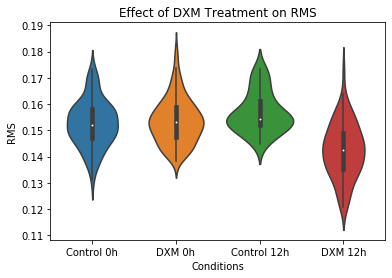

In [23]:
RMS = np.concatenate([df_control_zeroh["RMS"], df_drug_zeroh["RMS"], df_control_twelveh["RMS"], df_drug_twelveh["RMS"]])
PWSData = pd.DataFrame(columns = ['Rep','RMS'])
rep = np.concatenate((np.repeat(1,len(df_control_zeroh['RMS'].values)),np.repeat(2,len(df_control_twelveh['RMS'].values)),np.repeat(3,len(df_drug_zeroh['RMS'].values)),np.repeat(4,len(df_drug_twelveh['RMS'].values))),axis=0)
PWSData['RMS'] = RMS
PWSData['Rep'] = rep
PWSData_no_nan = PWSData.dropna()

ax = sns.violinplot(x='Rep',y='RMS',data=PWSData_no_nan)

ax.set_title("Effect of DXM Treatment on RMS")
plt.xlabel("Conditions")
plt.ylabel("RMS")

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Control 0h'
labels[1] = 'DXM 0h'
labels[2] = 'Control 12h'
labels[3] = 'DXM 12h'

ax.set_xticklabels(labels)

plt.savefig("Effect of DXM Treatment on RMS Violin Best")

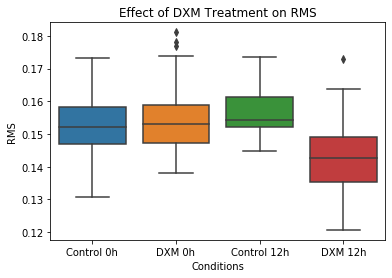

In [24]:
ax = sns.boxplot(x="Rep", y="RMS", data=PWSData_no_nan)

ax.set_title("Effect of DXM Treatment on RMS")
plt.xlabel("Conditions")
plt.ylabel("RMS")

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Control 0h'
labels[1] = 'DXM 0h'
labels[2] = 'Control 12h'
labels[3] = 'DXM 12h'

ax.set_xticklabels(labels)

plt.savefig("Effect of DXM Treatment on RMS Bar Best")

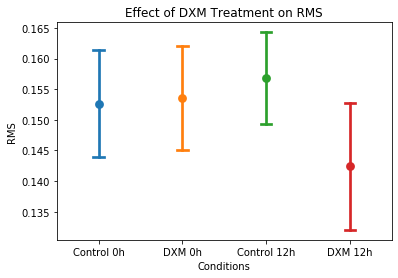

In [25]:
ax = sns.pointplot(x="Rep", y="RMS", hue='Rep',join=False,capsize=0.125,data=PWSData_no_nan,ci='sd')

ax.set_title("Effect of DXM Treatment on RMS")
plt.xlabel("Conditions")
plt.ylabel("RMS")

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Control 0h'
labels[1] = 'DXM 0h'
labels[2] = 'Control 12h'
labels[3] = 'DXM 12h'

ax.set_xticklabels(labels)
ax.get_legend().remove()

plt.savefig("Effect of DXM Treatment on RMS Error Bar Best")